In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('../input/Date_Sentiments.csv')

In [3]:
# Creating new columns of each sentiments
df['Sentiment_1'] = df['Sentiments'].apply(lambda x: 1 if x == 1 else 0)
df['Sentiment_neg_1'] = df['Sentiments'].apply(lambda x: 1 if x == -1 else 0)
df['Sentiment_0'] = df['Sentiments'].apply(lambda x: 1 if x == 0 else 0)

In [4]:
# Accessing different dates and storing it in the list...
date_list = list(sorted(set([i for i in df['Date']])))

In [5]:
# Creating empty dictionaries; used to update dates along with its probabilities of sentiments
sentiment_1_dict = dict()
sentiment_neg_1_dict = dict()
sentiment_0_dict = dict()

for dates in date_list:
    for ids in np.where(df.Date == dates):
        total_setiments = len(df.loc[ids, 'Sentiments'])
        total_pos_sentiment = sum(df.loc[ids, 'Sentiment_1'])
        total_neg_sentiment = sum(df.loc[ids, 'Sentiment_neg_1'])
        total_neutral_sentiment = sum(df.loc[ids, 'Sentiment_0'])

        # updates the respective probabilities of sentiments in each dictionaries
        sentiment_1_dict[dates] = round(total_pos_sentiment/total_setiments, 3)
        sentiment_neg_1_dict[dates] = round(
            total_neg_sentiment/total_setiments, 3)
        sentiment_0_dict[dates] = round(
            total_neutral_sentiment/total_setiments, 3)

In [6]:
df1=pd.DataFrame({
    'Date': list(sentiment_1_dict.keys()),
    'Positive': list(sentiment_1_dict.values()),
    'Negative': list(sentiment_neg_1_dict.values()),
    'Neutral': list(sentiment_0_dict.values())
})

In [7]:
df1.head()

,Date,Positive,Negative,Neutral
0,2020-03-20,0.387,0.243,0.370
1,2020-03-21,0.382,0.233,0.384
2,2020-03-22,0.465,0.248,0.287
3,2020-03-23,0.372,0.234,0.394
4,2020-03-24,0.363,0.181,0.457


In [8]:
df1.shape

(70, 4)

In [9]:
df1.tail()

,Date,Positive,Negative,Neutral
65,2020-05-27,0.560,0.136,0.304
66,2020-05-28,0.464,0.154,0.382
67,2020-05-29,0.429,0.212,0.359
68,2020-05-30,0.402,0.167,0.431
69,2020-05-31,0.446,0.174,0.380


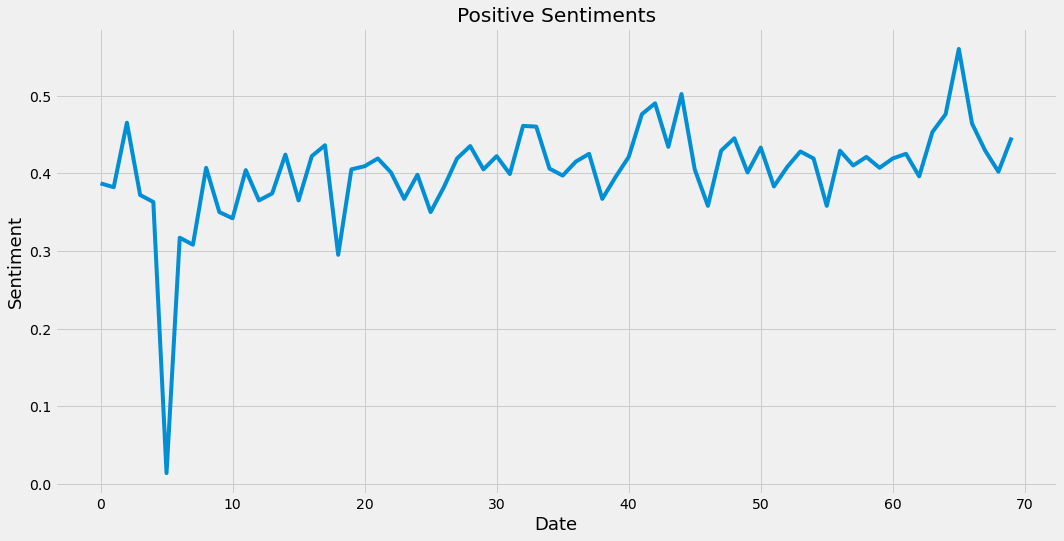

In [10]:
# Visualising Positive sentiments
plt.figure(figsize=(16,8))
plt.title('Positive Sentiments')
plt.plot(df1['Positive'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Sentiment', fontsize=18)
plt.show()

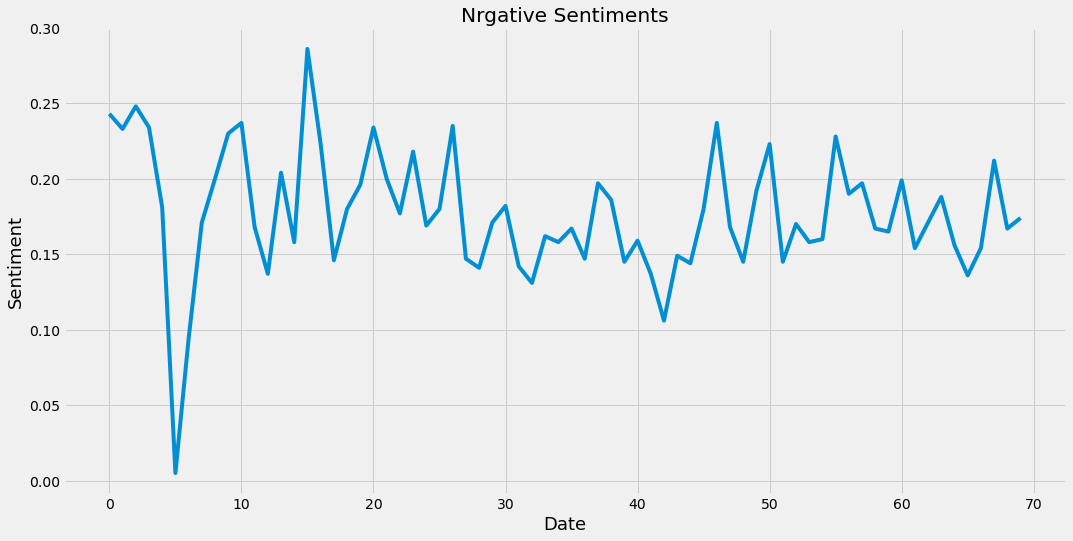

In [11]:
# Visualising Positive sentiments
plt.figure(figsize=(16,8))
plt.title('Nrgative Sentiments')
plt.plot(df1['Negative'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Sentiment', fontsize=18)
plt.show()

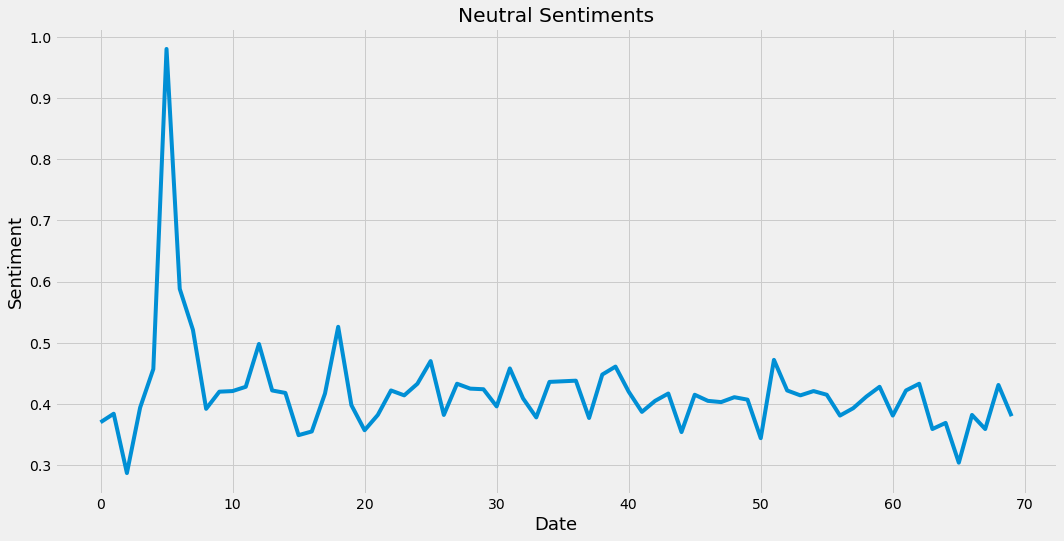

In [12]:
# Visualising Positive sentiments
plt.figure(figsize=(16,8))
plt.title('Neutral Sentiments')
plt.plot(df1['Neutral'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Sentiment', fontsize=18)
plt.show()

## Positive

In [13]:
# Create a new dataframe with only Positive, Negative and neutral columns in it
data_pos = df1.filter(['Positive'])

# Convert the dataframe to numpy array
dataset_pos = data_pos.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset_pos) * 0.8)
print('training_data_len-->', training_data_len)

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_pos = scaler.fit_transform(dataset_pos)
print('Scaled data(positive)-->', scaled_data_pos)

# Create the training data set
# Create the scaled training data set
train_data_pos = scaled_data_pos[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train_pos = []
y_train_pos = []

for i in range(10, len(train_data_pos)):
    x_train_pos.append(train_data_pos[i-10:i, 0])
    y_train_pos.append(train_data_pos[i, 0])
    if i<=11:
        print('x_train_pos-->', x_train_pos)
        print('y_train_pos-->', y_train_pos)
        print()

# Convert the x_train and y_train to numpy arrays
x_train_pos, y_train_pos = np.array(x_train_pos), np.array(y_train_pos)

# Reshape the data
x_train_pos = np.reshape(x_train_pos, (x_train_pos.shape[0], x_train_pos.shape[1], 1))

print('x_train_pos_len-->', x_train_pos.shape)

training_data_len--> 56
Scaled data(positive)--> [[0.68315018]
 [0.67399267]
 [0.82600733]
 [0.65567766]
 [0.63919414]
 [0.        ]
 [0.55494505]
 [0.53846154]
 [0.71978022]
 [0.61538462]
 [0.6007326 ]
 [0.71428571]
 [0.64285714]
 [0.65934066]
 [0.75091575]
 [0.64285714]
 [0.74725275]
 [0.77289377]
 [0.51465201]
 [0.71611722]
 [0.72344322]
 [0.74175824]
 [0.70879121]
 [0.64652015]
 [0.7032967 ]
 [0.61538462]
 [0.67399267]
 [0.74175824]
 [0.77106227]
 [0.71611722]
 [0.74725275]
 [0.70512821]
 [0.81868132]
 [0.81684982]
 [0.71794872]
 [0.7014652 ]
 [0.73443223]
 [0.75274725]
 [0.64652015]
 [0.6978022 ]
 [0.74542125]
 [0.84615385]
 [0.87179487]
 [0.76923077]
 [0.89377289]
 [0.71611722]
 [0.63003663]
 [0.76007326]
 [0.78937729]
 [0.70879121]
 [0.76739927]
 [0.67582418]
 [0.72161172]
 [0.75824176]
 [0.74175824]
 [0.63003663]
 [0.76007326]
 [0.72527473]
 [0.74542125]
 [0.71978022]
 [0.74175824]
 [0.75274725]
 [0.6996337 ]
 [0.8040293 ]
 [0.84615385]
 [1.        ]
 [0.82417582]
 [0.76007326]

In [14]:
# Build the LSTM model
model_pos = Sequential()
model_pos.add(LSTM(50, return_sequences=True, input_shape = (x_train_pos.shape[1], 1)))
model_pos.add(LSTM(50, return_sequences=False))
model_pos.add(Dense(25))
model_pos.add(Dense(1))

In [15]:
# Compile the model
model_pos.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# Train the model(positive)
model_pos.fit(x_train_pos, y_train_pos, batch_size=50, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5713
Epoch 2/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4894
Epoch 3/5000
1/1 [==============================] - 0s 994us/step - loss: 0.4153
Epoch 4/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3473
Epoch 5/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2840
Epoch 6/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2245
Epoch 7/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1688
Epoch 8/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1173
Epoch 9/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0719
Epoch 10/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0352
Epoch 11/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 12/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 13/5000
1/1 [============================

1/1 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 104/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 105/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 106/5000
1/1 [==============================] - 0s 931us/step - loss: 0.0047
Epoch 107/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 108/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 109/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 110/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 111/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 112/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 114/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 115/5000
1/1 [=====================

1/1 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 205/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 206/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 207/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 208/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 209/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 210/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 211/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 212/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 215/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 216/5000
1/1 [======================

1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 306/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 307/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 308/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 309/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 310/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 311/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 312/5000
1/1 [==============================] - 0s 982us/step - loss: 0.0046
Epoch 313/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 314/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 315/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 316/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 317/5000
1/1 [=====================

1/1 [==============================] - 0s 985us/step - loss: 0.0046
Epoch 406/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 407/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 408/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 409/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 410/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 411/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 412/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 413/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 415/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 416/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 417/5000
1/1 [=====================

1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 507/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 508/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 509/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 510/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 511/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 512/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 513/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 514/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 515/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 516/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 517/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 518/5000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 608/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 609/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 610/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 611/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 612/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 613/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 614/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 615/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 616/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 618/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 619/5000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 709/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 710/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 711/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 712/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 714/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 715/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 716/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 717/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 718/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 720/5000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 810/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 811/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 812/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 813/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 814/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 815/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 816/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 817/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 818/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 819/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 820/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 821/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 910/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 911/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 912/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 913/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 914/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 915/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 916/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 917/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 918/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 919/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 920/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 921/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1010/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1011/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1012/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1013/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1014/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1015/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1016/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1017/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1018/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 1020/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1021/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1109/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1110/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1111/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1112/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1114/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 1116/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1117/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 1118/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1119/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1120/5000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1209/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1210/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1211/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1212/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1213/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0045
Epoch 1214/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1215/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1216/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1217/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1218/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1219/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1220/5000
1/1 [=========

1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1308/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1309/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1310/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1311/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1312/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1313/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1314/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1315/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1316/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1317/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1318/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 1319/5000
1/1 [===========

Epoch 1407/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1408/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1409/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1410/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1411/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1412/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 1413/5000
1/1 [==============================] - 0s 990us/step - loss: 0.0045
Epoch 1414/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1415/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1417/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1418/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1419/500

1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1507/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1508/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1509/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1510/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1511/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1512/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1513/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1514/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1515/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1516/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1517/5000
1/1 [==============================] - ETA: 0s - loss: 0.004 - 0s 2ms/step - loss: 0.0045
Epoch 15

1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1606/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1607/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1608/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1609/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1610/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1611/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1612/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1613/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1614/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1615/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1616/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1617/5000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1706/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 1707/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1708/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1709/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1710/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1711/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1712/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1713/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1714/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1715/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1716/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1717/5000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1806/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1807/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1808/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1809/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1810/5000
1/1 [==============================] - 0s 974us/step - loss: 0.0045
Epoch 1811/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1812/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1813/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1814/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1815/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1816/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1817/5000
1/1 [=========

Epoch 1905/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1906/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1907/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1908/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1909/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1910/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1911/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1912/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1913/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1914/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1915/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1916/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 1917/5000


1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2005/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2006/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2007/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2008/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2009/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2010/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2011/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2012/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2013/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2014/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2015/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2016/5000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2104/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2105/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2106/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2107/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2108/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 2109/5000
1/1 [==============================] - 0s 994us/step - loss: 0.0045
Epoch 2110/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2111/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2112/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 2113/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2114/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2115/5000
1/1 [=========

1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2203/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2204/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2205/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 2206/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2207/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2208/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2209/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 2210/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2211/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2212/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2213/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2214/5000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2302/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2303/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2304/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2305/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2306/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2307/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2308/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2309/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2310/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2311/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 2312/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2313/5000
1/1 [===========

Epoch 2401/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2402/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2403/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 2404/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2405/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2406/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2407/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2408/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2409/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2410/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2411/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2412/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2413/5000


1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2501/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2502/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2503/5000
1/1 [==============================] - 0s 982us/step - loss: 0.0045
Epoch 2504/5000
1/1 [==============================] - 0s 961us/step - loss: 0.0045
Epoch 2505/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2506/5000
1/1 [==============================] - 0s 940us/step - loss: 0.0045
Epoch 2507/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2508/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2509/5000
1/1 [==============================] - 0s 976us/step - loss: 0.0045
Epoch 2510/5000
1/1 [==============================] - 0s 986us/step - loss: 0.0045
Epoch 2511/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2512/5000
1/1 [=

1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 2600/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2601/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2602/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2603/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2604/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2605/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2606/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2607/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2608/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2609/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2610/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2611/5000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2700/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2701/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2702/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2703/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2704/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2705/5000
1/1 [==============================] - 0s 985us/step - loss: 0.0045
Epoch 2706/5000
1/1 [==============================] - 0s 985us/step - loss: 0.0045
Epoch 2707/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2708/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2709/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2710/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2711/5000
1/1 [=======

Epoch 2799/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 2800/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2801/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2802/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2803/5000
1/1 [==============================] - 0s 929us/step - loss: 0.0045
Epoch 2804/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2805/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 2806/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2807/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2808/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 2809/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 2810/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 2811/500

1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2899/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2900/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 2901/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2902/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 2903/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2904/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2905/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2906/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 2907/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2908/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2909/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2910/5000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2998/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 2999/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3000/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3001/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3002/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 3003/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3004/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3005/5000
1/1 [==============================] - 0s 972us/step - loss: 0.0045
Epoch 3006/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3007/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3008/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3009/5000
1/1 [=========

1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3097/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3098/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3099/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3100/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3101/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3102/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3103/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3104/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3105/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3106/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3107/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3108/5000
1/1 [===========

Epoch 3196/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3197/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3198/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3199/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3200/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3201/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3202/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3203/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3204/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3205/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3206/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 3207/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3208/5000


1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3296/5000
1/1 [==============================] - 0s 975us/step - loss: 0.0045
Epoch 3297/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3298/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3299/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3300/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3301/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3302/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3303/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3304/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3305/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3306/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3307/5000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3395/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3396/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3397/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 3398/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3399/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3400/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3401/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3402/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3403/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3404/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3405/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 3406/5000
1/1 [===========

Epoch 3494/5000
1/1 [==============================] - 0s 939us/step - loss: 0.0045
Epoch 3495/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3496/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3497/5000
1/1 [==============================] - 0s 990us/step - loss: 0.0045
Epoch 3498/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3499/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3500/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3501/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3502/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3503/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3504/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3505/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3506/5

1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3594/5000
1/1 [==============================] - 0s 962us/step - loss: 0.0045
Epoch 3595/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3596/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3597/5000
1/1 [==============================] - 0s 925us/step - loss: 0.0045
Epoch 3598/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3599/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 3600/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3601/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3602/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3603/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3604/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3605/5000
1/1 [=======

Epoch 3693/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 3694/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3695/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3696/5000
1/1 [==============================] - 0s 993us/step - loss: 0.0045
Epoch 3697/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3698/5000
1/1 [==============================] - 0s 969us/step - loss: 0.0045
Epoch 3699/5000
1/1 [==============================] - 0s 928us/step - loss: 0.0045
Epoch 3700/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3701/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3702/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3703/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 3704/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3705

1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3793/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3794/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3795/5000
1/1 [==============================] - 0s 986us/step - loss: 0.0045
Epoch 3796/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3797/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3798/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3799/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3800/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3801/5000
1/1 [==============================] - 0s 986us/step - loss: 0.0045
Epoch 3802/5000
1/1 [==============================] - 0s 956us/step - loss: 0.0045
Epoch 3803/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3804/5000
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3892/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3893/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3894/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3895/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3896/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3897/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3898/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 3899/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3900/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3901/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3902/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3903/5000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3991/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3992/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3993/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3994/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3995/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3996/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3997/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3998/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3999/5000
1/1 [==============================] - 0s 993us/step - loss: 0.0045
Epoch 4000/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 4001/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 4002/5000
1/1 [=========

Epoch 4090/5000
1/1 [==============================] - 0s 987us/step - loss: 0.0044
Epoch 4091/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 4092/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 4093/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 4094/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 4095/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 4096/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 4097/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 4098/5000
1/1 [==============================] - 0s 941us/step - loss: 0.0044
Epoch 4099/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 4100/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 4101/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 4102/5

1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 4190/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 4191/5000
1/1 [==============================] - 0s 976us/step - loss: 0.0046
Epoch 4192/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 4193/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 4194/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 4195/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 4196/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 4197/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 4198/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 4199/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 4200/5000
1/1 [==============================] - 0s 977us/step - loss: 0.0044
Epoch 4201/5000
1/1 [=======

Epoch 4289/5000
1/1 [==============================] - 0s 949us/step - loss: 0.0042
Epoch 4290/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 4291/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 4292/5000
1/1 [==============================] - 0s 956us/step - loss: 0.0042
Epoch 4293/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 4294/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 4295/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 4296/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 4297/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 4298/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 4299/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 4300/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 4301/5

1/1 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 4389/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4390/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 4391/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 4392/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 4393/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4394/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4395/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4396/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4397/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4398/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4399/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4400/5000
1/1 [===========

1/1 [==============================] - 0s 934us/step - loss: 0.0040
Epoch 4489/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4490/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4491/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4492/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4493/5000
1/1 [==============================] - 0s 896us/step - loss: 0.0040
Epoch 4494/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4495/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4496/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4497/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4498/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4499/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4500/5000
1/1 [=======

1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4588/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4589/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 4590/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4591/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4592/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4593/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4594/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4595/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4596/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4597/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4598/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4599/5000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4688/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 4689/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4690/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4691/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4692/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4693/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4694/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4695/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4696/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 4697/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4698/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4699/5000
1/1 [===========

Epoch 4787/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4788/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4789/5000
1/1 [==============================] - 0s 963us/step - loss: 0.0040
Epoch 4790/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 4791/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4792/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 4793/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4794/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4795/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4796/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 4797/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 4798/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4799/500

1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4887/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4888/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4889/5000
1/1 [==============================] - 0s 961us/step - loss: 0.0040
Epoch 4890/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4891/5000
1/1 [==============================] - 0s 999us/step - loss: 0.0040
Epoch 4892/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4893/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4894/5000
1/1 [==============================] - 0s 996us/step - loss: 0.0040
Epoch 4895/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4896/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4897/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4898/5000
1/1 [=====

Epoch 4986/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 4987/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 4988/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 4989/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 4990/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4991/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4992/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 4993/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4994/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4995/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 4996/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4997/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4998/5000


In [17]:
# Create the testing data set
# Create a new array containing scaled values
test_data_pos = scaled_data_pos[training_data_len - 10: , :]
 
# Create the data sets x_test and y_test
x_test_pos = []
y_test_pos = dataset_pos[training_data_len: , :]
for i in range(10, len(test_data_pos)):
    x_test_pos.append(test_data_pos[i-10:i, 0])

In [18]:
# Convert the data into numpy array
x_test_pos = np.array(x_test_pos)

In [19]:
# Reshape the data
x_test_pos = np.reshape(x_test_pos, (x_test_pos.shape[0], x_test_pos.shape[1], 1))

In [20]:
# Get the models predicted values
predictions_pos = model_pos.predict(x_test_pos)
predictions_pos = scaler.inverse_transform(predictions_pos)

In [21]:
# Get the root mean squared error (RMSE)
rmse_pos = np.sqrt( np.mean( predictions_pos - y_test_pos )**2 )
rmse_pos

0.026895583067621503

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


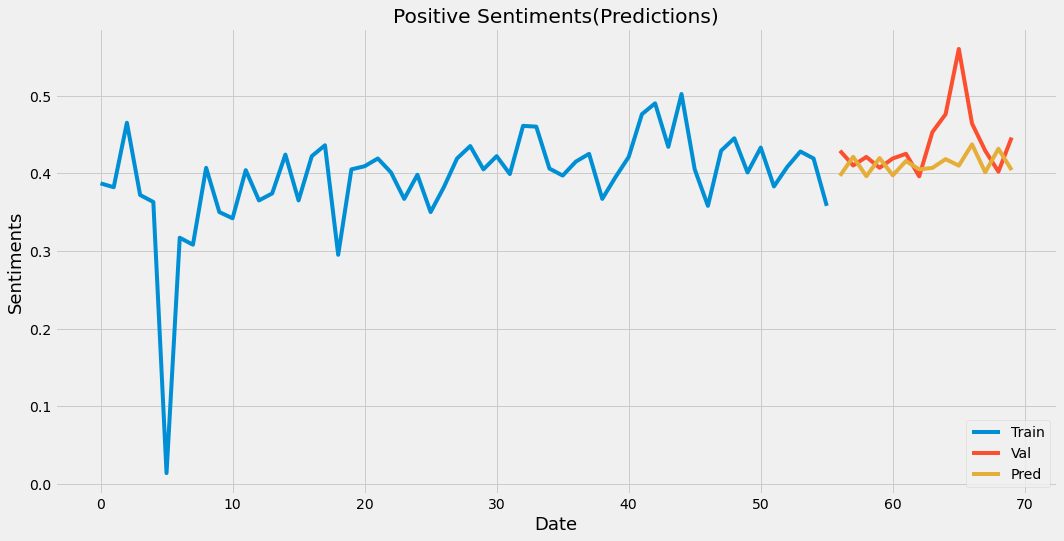

In [22]:
# Plot the data
train_pos = data_pos[:training_data_len]
valid_pos = data_pos[training_data_len:]
valid_pos['Predictions'] = predictions_pos

# Visualization
plt.figure(figsize=(16,8))
plt.title('Positive Sentiments(Predictions)')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Sentiments', fontsize=18)
plt.plot(train_pos['Positive'])
plt.plot(valid_pos[['Positive', 'Predictions']])
plt.legend(['Train', 'Val', 'Pred'], loc='lower right')
plt.show()

valid_pos-->     Positive  Predictions
56     0.429     0.396725
57     0.410     0.421142
58     0.421     0.396148
59     0.407     0.419521
60     0.419     0.397327
61     0.425     0.415740
62     0.396     0.404948
63     0.453     0.406921
64     0.476     0.418161
65     0.560     0.409805
66     0.464     0.437143
67     0.429     0.401270
68     0.402     0.431494
69     0.446     0.404116
x_input_pos--> (1, 10)
[0.5912869]
11
1 day input [0.41574043 0.40494782 0.40692115 0.4181608  0.40980497 0.43714273
 0.40127012 0.43149436 0.40411609 0.5912869 ]
1 day output [[0.6415796]]
2 day input [0.40494782 0.40692115 0.4181608  0.40980497 0.43714273 0.40127012
 0.43149436 0.40411609 0.5912869  0.64157963]
2 day output [[0.6138731]]
3 day input [0.40692115 0.4181608  0.40980497 0.43714273 0.40127012 0.43149436
 0.40411609 0.5912869  0.64157963 0.61387312]
3 day output [[0.64328617]]
4 day input [0.4181608  0.40980497 0.43714273 0.40127012 0.43149436 0.40411609
 0.5912869  0.64157963 

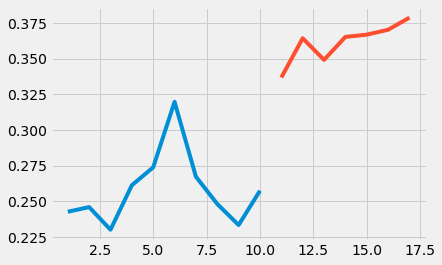

In [23]:
print('valid_pos-->', valid_pos)


x_input_pos=predictions_pos[4:].reshape(1,-1)
print('x_input_pos-->', x_input_pos.shape)


temp_input_pos=list(x_input_pos)
temp_input_pos=temp_input_pos[0].tolist()


# demonstrate prediction for next 7 days
from numpy import array

lst_output_pos=[]
n_steps=10
i=0
while(i<7):
    
    if(len(temp_input_pos)>10):
        #print(temp_input)
        x_input_pos=np.array(temp_input_pos[1:])
        print("{} day input {}".format(i,x_input_pos))
        x_input_pos=x_input_pos.reshape(1,-1)
        x_input_pos = x_input_pos.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_pos.predict(x_input_pos, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input_pos.extend(yhat[0].tolist())
        temp_input_pos=temp_input_pos[1:]
        #print(temp_input)
        lst_output_pos.extend(yhat.tolist())
        i=i+1
    else:
        x_input_pos = x_input_pos.reshape((1, n_steps,1))
        yhat = model_pos.predict(x_input_pos, verbose=0)
        print(yhat[0])
        temp_input_pos.extend(yhat[0].tolist())
        print(len(temp_input_pos))
        lst_output_pos.extend(yhat.tolist())
        i=i+1
    
print()
print('next_seven_days_pred-->', lst_output_pos)


day_new=np.arange(1,11)
day_pred=np.arange(11, 18)


plt.plot(day_new,scaler.inverse_transform(data_pos[60:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output_pos))

## Negative Predictions

In [24]:
# Create a new dataframe with only Positive, Negative and neutral columns in it
data_neg = df1.filter(['Negative'])

# Convert the dataframe to numpy array
dataset_neg = data_neg.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset_neg) * 0.8)
print('training_data_len-->', training_data_len)

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_neg = scaler.fit_transform(dataset_neg)
print('Scaled data(negative)-->', scaled_data_neg)

# Create the training data set
# Create the scaled training data set
train_data_neg = scaled_data_neg[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train_neg = []
y_train_neg = []

for i in range(10, len(train_data_neg)):
    x_train_neg.append(train_data_neg[i-10:i, 0])
    y_train_neg.append(train_data_neg[i, 0])
    if i<=11:
        print('x_train_neg-->', x_train_neg)
        print('y_train_neg-->', y_train_neg)
        print()

# Convert the x_train and y_train to numpy arrays
x_train_neg, y_train_neg = np.array(x_train_neg), np.array(y_train_neg)

# Reshape the data
x_train_neg = np.reshape(x_train_neg, (x_train_neg.shape[0], x_train_neg.shape[1], 1))

print('x_train_neg_len-->', x_train_neg.shape)

training_data_len--> 56
Scaled data(negative)--> [[0.84697509]
 [0.8113879 ]
 [0.86476868]
 [0.81494662]
 [0.62633452]
 [0.        ]
 [0.31672598]
 [0.59074733]
 [0.69395018]
 [0.80071174]
 [0.82562278]
 [0.58007117]
 [0.46975089]
 [0.70818505]
 [0.54448399]
 [1.        ]
 [0.77580071]
 [0.50177936]
 [0.6227758 ]
 [0.6797153 ]
 [0.81494662]
 [0.69395018]
 [0.61209964]
 [0.75800712]
 [0.58362989]
 [0.6227758 ]
 [0.81850534]
 [0.50533808]
 [0.48398577]
 [0.59074733]
 [0.62989324]
 [0.48754448]
 [0.44839858]
 [0.55871886]
 [0.54448399]
 [0.57651246]
 [0.50533808]
 [0.68327402]
 [0.64412811]
 [0.49822064]
 [0.5480427 ]
 [0.46975089]
 [0.3594306 ]
 [0.51245552]
 [0.49466192]
 [0.6227758 ]
 [0.82562278]
 [0.58007117]
 [0.49822064]
 [0.66548043]
 [0.77580071]
 [0.49822064]
 [0.58718861]
 [0.54448399]
 [0.55160142]
 [0.79359431]
 [0.65836299]
 [0.68327402]
 [0.57651246]
 [0.56939502]
 [0.69039146]
 [0.53024911]
 [0.59074733]
 [0.65124555]
 [0.53736655]
 [0.46619217]
 [0.53024911]
 [0.7366548 ]

In [25]:
# Build the LSTM model
model_neg = Sequential()
model_neg.add(LSTM(50, return_sequences=True, input_shape = (x_train_neg.shape[1], 1)))
model_neg.add(LSTM(50, return_sequences=False))
model_neg.add(Dense(25))
model_neg.add(Dense(1))

In [26]:
# Compile the model
model_neg.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
# Train the model(negative)
model_neg.fit(x_train_neg, y_train_neg, batch_size=50, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3482
Epoch 2/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2895
Epoch 3/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2343
Epoch 4/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1827
Epoch 5/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1350
Epoch 6/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0922
Epoch 7/5000
1/1 [==============================] - 0s 922us/step - loss: 0.0561
Epoch 8/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0298
Epoch 9/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 10/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0216
Epoch 11/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0387
Epoch 12/5000
1/1 [==============================] - 0s 962us/step - loss: 0.0536
Epoch 13/5000
1/1 [==========================

1/1 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 104/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 105/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 106/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 107/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 108/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 109/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 110/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 111/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 112/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 114/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 115/5000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 205/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 206/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 207/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 208/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 209/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 210/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 211/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 212/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 213/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 214/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 215/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 216/5000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 306/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 307/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 308/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 309/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 310/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 311/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 312/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 313/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 314/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 315/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 316/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 317/5000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 407/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 408/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 409/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 410/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 411/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 412/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 413/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 414/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 415/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 417/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 418/5000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 508/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 509/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 510/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 511/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 512/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 513/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 514/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 515/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 516/5000
1/1 [==============================] - 0s 914us/step - loss: 0.0160
Epoch 517/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 518/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 519/5000
1/1 [=====================

1/1 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 608/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 609/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 610/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 611/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 612/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 614/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 615/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 616/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 617/5000
1/1 [==============================] - 0s 934us/step - loss: 0.0159
Epoch 618/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 619/5000
1/1 [=====================

1/1 [==============================] - 0s 1ms/step - loss: 0.0156
Epoch 709/5000
1/1 [==============================] - 0s 978us/step - loss: 0.0155
Epoch 710/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 711/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 712/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 713/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 714/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 715/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 716/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 718/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0180
Epoch 719/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 720/5000
1/1 [=====================

1/1 [==============================] - 0s 948us/step - loss: 0.0157
Epoch 810/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0174
Epoch 811/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 812/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 813/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 814/5000
1/1 [==============================] - 0s 914us/step - loss: 0.0159
Epoch 815/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 816/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 817/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 818/5000
1/1 [==============================] - 0s 992us/step - loss: 0.0156
Epoch 819/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 820/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0158
Epoch 821/5000
1/1 [=================

1/1 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 910/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0141
Epoch 911/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0141
Epoch 912/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0141
Epoch 913/5000
1/1 [==============================] - 0s 960us/step - loss: 0.0141
Epoch 914/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0141
Epoch 915/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0141
Epoch 916/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0141
Epoch 917/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0143
Epoch 918/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 919/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0187
Epoch 920/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0298
Epoch 921/5000
1/1 [=====================

1/1 [==============================] - 0s 967us/step - loss: 0.0136
Epoch 1011/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 1012/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 1013/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 1014/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 1015/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 1016/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 1017/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 1018/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 1019/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 1020/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 1021/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 1022/5000
1/1 [=========

Epoch 1110/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.0133
Epoch 1111/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 1112/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 1113/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 1114/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 1115/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 1116/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 1117/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 1118/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 1119/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 1120/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 1121/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 1122/5000

1/1 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 1210/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 1211/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 1212/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 1213/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0130
Epoch 1214/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 1215/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 1216/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 1217/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 1218/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 1219/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 1220/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0129
Epoch 1221/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 1310/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 1311/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 1312/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 1313/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 1314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 1315/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 1316/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 1317/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 1318/5000
1/1 [==============================] - 0s 973us/step - loss: 0.0128
Epoch 1319/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 1320/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 1321/5000
1/1 [=========

1/1 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 1409/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 1410/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 1411/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 1412/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 1413/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 1414/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 1415/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 1416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 1417/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 1418/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 1419/5000
1/1 [==============================] - 0s 989us/step - loss: 0.0127
Epoch 1420/5000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 1508/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 1509/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 1510/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 1511/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 1512/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 1513/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 1514/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 1515/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 1516/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 1517/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 1518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 1519/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1608/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1609/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1610/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1611/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1612/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1613/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1614/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1615/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1616/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1617/5000
1/1 [==============================] - 0s 955us/step - loss: 0.0124
Epoch 1618/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 1619/5000
1/1 [=========

Epoch 1707/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 1708/5000
1/1 [==============================] - 0s 914us/step - loss: 0.0121
Epoch 1709/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 1710/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 1711/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 1712/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 1713/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 1714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 1715/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 1716/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 1717/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 1718/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 1719/500

1/1 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 1807/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 1808/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 1809/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 1810/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 1811/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 1812/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 1813/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 1814/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 1815/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 1816/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 1817/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 1818/5000
1/1 [===========

Epoch 1906/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 1907/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 1908/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 1909/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 1910/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 1911/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 1912/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 1913/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 1914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 1915/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 1916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 1917/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 1918/5000


1/1 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 2006/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 2007/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 2008/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 2009/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 2010/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 2011/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 2012/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 2013/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 2014/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 2015/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 2016/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 2017/5000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 0.0184
Epoch 2105/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 2106/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0177
Epoch 2107/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0170
Epoch 2108/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 2109/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0162
Epoch 2110/5000
1/1 [==============================] - 0s 987us/step - loss: 0.0162
Epoch 2111/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0164
Epoch 2112/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0167
Epoch 2113/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0169
Epoch 2114/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0169
Epoch 2115/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 2116/5000
1/1 [=========

1/1 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 2204/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 2205/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 2206/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 2207/5000
1/1 [==============================] - 0s 970us/step - loss: 0.0154
Epoch 2208/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 2209/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 2210/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 2211/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 2212/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 2213/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 2214/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 2215/5000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 2303/5000
1/1 [==============================] - 0s 952us/step - loss: 0.0146
Epoch 2304/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0146
Epoch 2305/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0146
Epoch 2306/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0146
Epoch 2307/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0146
Epoch 2308/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0146
Epoch 2309/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0146
Epoch 2310/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0146
Epoch 2311/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0146
Epoch 2312/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0146
Epoch 2313/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 2314/5000
1/1 [=========

1/1 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 2402/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 2403/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 2404/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 2405/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 2406/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 2407/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0137
Epoch 2408/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0137
Epoch 2409/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 2410/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0137
Epoch 2411/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0137
Epoch 2412/5000
1/1 [==============================] - 0s 990us/step - loss: 0.0137
Epoch 2413/5000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 2501/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 2502/5000
1/1 [==============================] - 0s 993us/step - loss: 0.0131
Epoch 2503/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 2504/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 2505/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 2506/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 2507/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 2508/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 2509/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 2510/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 2511/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 2512/5000
1/1 [=========

1/1 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 2600/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 2601/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 2602/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 2603/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 2604/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 2605/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 2606/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 2607/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0125
Epoch 2608/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 2609/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 2610/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 2611/5000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 2700/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 2701/5000
1/1 [==============================] - 0s 931us/step - loss: 0.0122
Epoch 2702/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 2703/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 2704/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 2705/5000
1/1 [==============================] - 0s 967us/step - loss: 0.0122
Epoch 2706/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 2707/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 2708/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 2709/5000
1/1 [==============================] - 0s 960us/step - loss: 0.0122
Epoch 2710/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 2711/5000
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 2799/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 2800/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 2801/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 2802/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 2803/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 2804/5000
1/1 [==============================] - 0s 960us/step - loss: 0.0119
Epoch 2805/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 2806/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 2807/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 2808/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 2809/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 2810/5000
1/1 [=========

Epoch 2898/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 2899/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 2900/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 2901/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 2902/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 2903/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 2904/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 2905/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 2906/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 2907/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 2908/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 2909/5000
1/1 [==============================] - 0s 933us/step - loss: 0.0116
Epoch 2910/500

1/1 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 2998/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 2999/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 3000/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 3001/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 3002/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 3003/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 3004/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 3005/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 3006/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 3007/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 3008/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 3009/5000
1/1 [===========

Epoch 3097/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0102
Epoch 3098/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 3099/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 3100/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 3101/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 3102/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 3103/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 3104/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 3105/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 3106/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 3107/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 3108/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 3109/5000


1/1 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 3197/5000
1/1 [==============================] - 0s 990us/step - loss: 0.0091
Epoch 3198/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 3199/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 3200/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 3201/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 3202/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 3203/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 3204/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 3205/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 3206/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 3207/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 3208/5000
1/1 [=========

1/1 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 3296/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 3297/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 3298/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 3299/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 3300/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 3301/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 3302/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 3303/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 3304/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 3305/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 3306/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 3307/5000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 3395/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 3396/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 3397/5000
1/1 [==============================] - ETA: 0s - loss: 0.007 - 0s 1ms/step - loss: 0.0078
Epoch 3398/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 3399/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 3400/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 3401/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 3402/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 3403/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 3404/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 3405/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 34

1/1 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 3494/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 3495/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 3496/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 3497/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 3498/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 3499/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 3500/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 3501/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 3502/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 3503/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 3504/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 3505/5000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 3594/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 3595/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 3596/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 3597/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 3598/5000
1/1 [==============================] - 0s 957us/step - loss: 0.0071
Epoch 3599/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 3600/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 3601/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 3602/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 3603/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 3604/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 3605/5000
1/1 [=========

1/1 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 3694/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 3695/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 3696/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 3697/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 3698/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 3699/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 3700/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 3701/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 3702/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 3703/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 3704/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 3705/5000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 3794/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 3795/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 3796/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 3797/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 3798/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 3799/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 3800/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 3801/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 3802/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 3803/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 3804/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 3805/5000
1/1 [===========

Epoch 3893/5000
1/1 [==============================] - 0s 936us/step - loss: 0.0065
Epoch 3894/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 3895/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 3896/5000
1/1 [==============================] - ETA: 0s - loss: 0.006 - 0s 2ms/step - loss: 0.0065
Epoch 3897/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 3898/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 3899/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 3900/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 3901/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 3902/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 3903/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 3904/5000
1/1 [==============================] - 0s 1ms/step - los

1/1 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 3993/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 3994/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 3995/5000
1/1 [==============================] - 0s 969us/step - loss: 0.0062
Epoch 3996/5000
1/1 [==============================] - 0s 943us/step - loss: 0.0062
Epoch 3997/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 3998/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 3999/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 4000/5000
1/1 [==============================] - 0s 987us/step - loss: 0.0062
Epoch 4001/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 4002/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 4003/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 4004/5000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0059
Epoch 4093/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 4094/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 4095/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 4096/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 4097/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 4098/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 4099/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 4100/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 4101/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 4102/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 4103/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 4104/5000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 4193/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 4194/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 4195/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 4196/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 4197/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 4198/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 4199/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 4200/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 4201/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 4202/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 4203/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 4204/5000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 4292/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 4293/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 4294/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 4295/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 4296/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 4297/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 4298/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 4299/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 4300/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 4301/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 4302/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 4303/5000
1/1 [===========

Epoch 4391/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 4392/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 4393/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 4394/5000
1/1 [==============================] - 0s 973us/step - loss: 0.0048
Epoch 4395/5000
1/1 [==============================] - 0s 990us/step - loss: 0.0048
Epoch 4396/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 4397/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 4398/5000
1/1 [==============================] - 0s 994us/step - loss: 0.0048
Epoch 4399/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 4400/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 4401/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 4402/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 4403

1/1 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 4491/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 4492/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 4493/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 4494/5000
1/1 [==============================] - 0s 981us/step - loss: 0.0046
Epoch 4495/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 4496/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 4497/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 4498/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 4499/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 4500/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 4501/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 4502/5000
1/1 [=========

Epoch 4590/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 4591/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 4592/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 4593/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 4594/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 4595/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 4596/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 4597/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 4598/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 4599/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 4600/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 4601/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 4602/5000


1/1 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 4690/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 4691/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4692/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4693/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4694/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4695/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4696/5000
1/1 [==============================] - 0s 977us/step - loss: 0.0041
Epoch 4697/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4698/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4699/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4700/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4701/5000
1/1 [=========

Epoch 4789/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 4790/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4791/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 4792/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4793/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4794/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 4795/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 4796/5000
1/1 [==============================] - 0s 980us/step - loss: 0.0040
Epoch 4797/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4798/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4799/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 4800/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4801/500

1/1 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 4889/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 4890/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 4891/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 4892/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4893/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 4894/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 4895/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4896/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 4897/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 4898/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4899/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 4900/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 4989/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 4990/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 4991/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 4992/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 4993/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 4994/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 4995/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 4996/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 4997/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 4998/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 4999/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 5000/5000
1/1 [===========

In [28]:
# Create the testing data set
# Create a new array containing scaled values
test_data_neg = scaled_data_neg[training_data_len - 10: , :]
 
# Create the data sets x_test and y_test
x_test_neg = []
y_test_neg = dataset_neg[training_data_len: , :]
for i in range(10, len(test_data_neg)):
    x_test_neg.append(test_data_neg[i-10:i, 0])

In [29]:
# Convert the data into numpy array
x_test_neg = np.array(x_test_neg)

In [30]:
# Reshape the data
x_test_neg = np.reshape(x_test_neg, (x_test_neg.shape[0], x_test_neg.shape[1], 1))

In [31]:
# Get the models predicted values
predictions_neg = model_neg.predict(x_test_neg)
predictions_neg = scaler.inverse_transform(predictions_neg)

In [32]:
# Get the root mean squared error (RMSE)
rmse_neg = np.sqrt( np.mean( predictions_neg - y_test_neg )**2 )
rmse_neg

0.005906215224947252

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


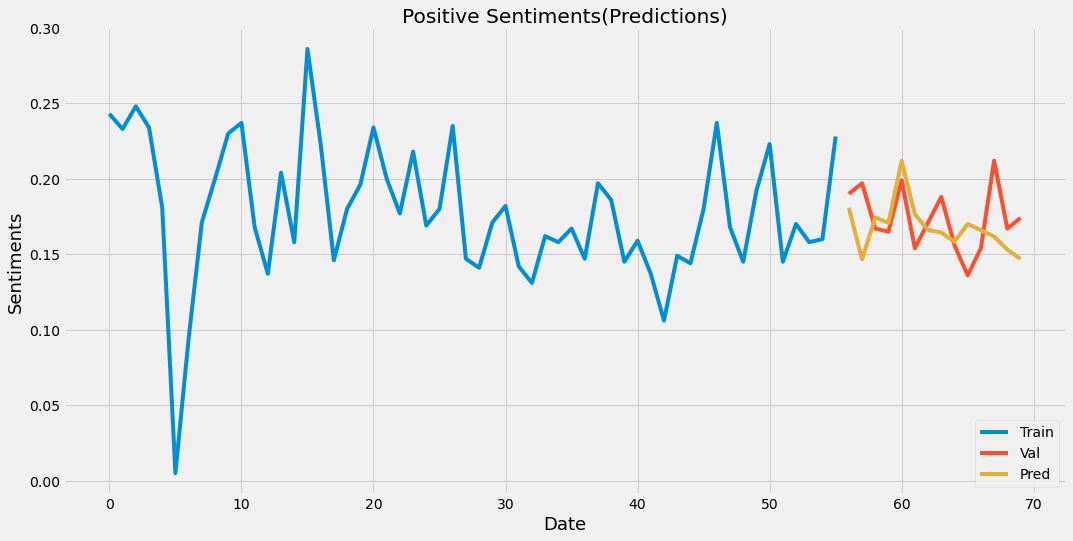

In [33]:
# Plot the data
train_neg = data_neg[:training_data_len]
valid_neg = data_neg[training_data_len:]
valid_neg['Predictions'] = predictions_neg

# Visualization
plt.figure(figsize=(16,8))
plt.title('Positive Sentiments(Predictions)')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Sentiments', fontsize=18)
plt.plot(train_neg['Negative'])
plt.plot(valid_neg[['Negative', 'Predictions']])
plt.legend(['Train', 'Val', 'Pred'], loc='lower right')
plt.show()

valid_neg-->     Negative  Predictions
56     0.190     0.180624
57     0.197     0.146703
58     0.167     0.174324
59     0.165     0.170801
60     0.199     0.211935
61     0.154     0.176502
62     0.171     0.166115
63     0.188     0.164334
64     0.156     0.158270
65     0.136     0.170103
66     0.154     0.165885
67     0.212     0.161770
68     0.167     0.153109
69     0.174     0.146838
x_input_neg--> (1, 10)
[0.52288145]
11
1 day input [0.17650193 0.16611508 0.16433407 0.15826991 0.17010266 0.16588511
 0.16176958 0.15310875 0.14683789 0.52288145]
1 day output [[0.4980407]]
2 day input [0.16611508 0.16433407 0.15826991 0.17010266 0.16588511 0.16176958
 0.15310875 0.14683789 0.52288145 0.49804071]
2 day output [[0.53066146]]
3 day input [0.16433407 0.15826991 0.17010266 0.16588511 0.16176958 0.15310875
 0.14683789 0.52288145 0.49804071 0.53066146]
3 day output [[0.6081407]]
4 day input [0.15826991 0.17010266 0.16588511 0.16176958 0.15310875 0.14683789
 0.52288145 0.49804071

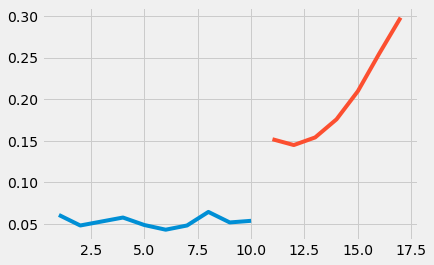

In [34]:
print('valid_neg-->', valid_neg)


x_input_neg=predictions_neg[4:].reshape(1,-1)
print('x_input_neg-->', x_input_neg.shape)


temp_input_neg=list(x_input_neg)
temp_input_neg=temp_input_neg[0].tolist()


# demonstrate prediction for next 7 days
from numpy import array

lst_output_neg=[]
n_steps=10
i=0
while(i<7):
    
    if(len(temp_input_neg)>10):
        #print(temp_input)
        x_input_neg=np.array(temp_input_neg[1:])
        print("{} day input {}".format(i,x_input_neg))
        x_input_neg=x_input_neg.reshape(1,-1)
        x_input_neg = x_input_neg.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_neg.predict(x_input_neg, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input_neg.extend(yhat[0].tolist())
        temp_input_neg=temp_input_neg[1:]
        #print(temp_input)
        lst_output_neg.extend(yhat.tolist())
        i=i+1
    else:
        x_input_neg = x_input_neg.reshape((1, n_steps,1))
        yhat = model_neg.predict(x_input_neg, verbose=0)
        print(yhat[0])
        temp_input_neg.extend(yhat[0].tolist())
        print(len(temp_input_neg))
        lst_output_neg.extend(yhat.tolist())
        i=i+1
    
print()
print('next_seven_days_pred-->', lst_output_neg)


day_new=np.arange(1,11)
day_pred=np.arange(11, 18)


plt.plot(day_new,scaler.inverse_transform(data_neg[60:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output_neg))

## Neutral Predictions

In [35]:
# Create a new dataframe with only Positive, Negative and neutral columns in it
data_neut = df1.filter(['Neutral'])

# Convert the dataframe to numpy array
dataset_neut = data_neut.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset_neut) * 0.8)
print('training_data_len-->', training_data_len)

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_neut = scaler.fit_transform(dataset_neut)
print('Scaled data(neutral)-->', scaled_data_neut)

# Create the training data set
# Create the scaled training data set
train_data_neut = scaled_data_neut[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train_neut = []
y_train_neut = []

for i in range(10, len(train_data_neut)):
    x_train_neut.append(train_data_neut[i-10:i, 0])
    y_train_neut.append(train_data_neut[i, 0])
    if i<=11:
        print('x_train_neut-->', x_train_neut)
        print('y_train_neut-->', y_train_neut)
        print()
        
# Convert the x_train and y_train to numpy arrays
x_train_neut, y_train_neut = np.array(x_train_neut), np.array(y_train_neut)

# Reshape the data
x_train_neut = np.reshape(x_train_neut, (x_train_neut.shape[0], x_train_neut.shape[1], 1))

print('x_train_neut_len-->', x_train_neut.shape)

training_data_len--> 56
Scaled data(neutral)--> [[0.11976912]
 [0.13997114]
 [0.        ]
 [0.15440115]
 [0.24531025]
 [1.        ]
 [0.43434343]
 [0.33766234]
 [0.15151515]
 [0.19191919]
 [0.19336219]
 [0.2034632 ]
 [0.3044733 ]
 [0.19480519]
 [0.18903319]
 [0.08946609]
 [0.0981241 ]
 [0.18759019]
 [0.34487734]
 [0.16017316]
 [0.1010101 ]
 [0.13708514]
 [0.19480519]
 [0.18326118]
 [0.21067821]
 [0.26406926]
 [0.13708514]
 [0.21067821]
 [0.1991342 ]
 [0.1976912 ]
 [0.15728716]
 [0.24675325]
 [0.17604618]
 [0.13131313]
 [0.21500722]
 [0.21645022]
 [0.21789322]
 [0.12987013]
 [0.23232323]
 [0.25108225]
 [0.19191919]
 [0.14430014]
 [0.17027417]
 [0.18759019]
 [0.0966811 ]
 [0.18470418]
 [0.17027417]
 [0.16738817]
 [0.17893218]
 [0.17316017]
 [0.08225108]
 [0.26695527]
 [0.19480519]
 [0.18326118]
 [0.19336219]
 [0.18470418]
 [0.13564214]
 [0.15295815]
 [0.18037518]
 [0.2034632 ]
 [0.13564214]
 [0.19480519]
 [0.21067821]
 [0.1038961 ]
 [0.11832612]
 [0.02453102]
 [0.13708514]
 [0.1038961 ]


In [36]:
# Build the LSTM model
model_neut = Sequential()
model_neut.add(LSTM(50, return_sequences=True, input_shape = (x_train_neut.shape[1], 1)))
model_neut.add(LSTM(50, return_sequences=False))
model_neut.add(Dense(25))
model_neut.add(Dense(1))

In [37]:
# Compile the model
model_neut.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
# # Train the model(neutral)
model_neut.fit(x_train_neut, y_train_neut, batch_size=50, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0375
Epoch 2/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0260
Epoch 3/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1595/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1596/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1597/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1598/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1599/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1600/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1601/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1602/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1603/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1604/5000
1/1 [====

1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1691/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1692/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1693/5000
1/1 [==============================] - 0s 987us/step - loss: 0.0016
Epoch 1694/5000
1/1 [==============================] - 0s 997us/step - loss: 0.0016
Epoch 1695/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1696/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1697/5000
1/1 [==============================] - 0s 967us/step - loss: 0.0016
Epoch 1698/5000
1/1 [==============================] - 0s 975us/step - loss: 0.0016
Epoch 1699/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1700/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1701/5000
1/1 [==============================] - 0s 962us/step - loss: 0.0016
Epoch 1702/5000
1/1 [=

1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1790/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1791/5000
1/1 [==============================] - 0s 988us/step - loss: 0.0016
Epoch 1792/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1793/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1794/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1795/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1796/5000
1/1 [==============================] - 0s 906us/step - loss: 0.0016
Epoch 1797/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1798/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1799/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1800/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1801/5000
1/1 [=======

1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1889/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1890/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1891/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1892/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1893/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1894/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1895/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1896/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1897/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1898/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1899/5000
1/1 [==============================] - 0s 994us/step - loss: 0.0016
Epoch 1900/5000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1988/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 1989/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1990/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 1991/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 1992/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 1993/5000
1/1 [==============================] - 0s 941us/step - loss: 0.0015
Epoch 1994/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 1995/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 1996/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 1997/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1998/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 1999/5000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 2087/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2088/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2089/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2090/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2091/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 2092/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2093/5000
1/1 [==============================] - 0s 991us/step - loss: 0.0015
Epoch 2094/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 2095/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 2096/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2097/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2098/5000
1/1 [=========

1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2186/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2187/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 2188/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 2189/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 2190/5000
1/1 [==============================] - 0s 971us/step - loss: 0.0024
Epoch 2191/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 2192/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 2193/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 2194/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 2195/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 2196/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 2197/5000
1/1 [=========

1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2285/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2286/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2287/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2288/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 2289/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2290/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2291/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2292/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2293/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2294/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2295/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2296/5000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 2384/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 2385/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 2386/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 2387/5000
1/1 [==============================] - 0s 960us/step - loss: 0.0018
Epoch 2388/5000
1/1 [==============================] - 0s 989us/step - loss: 0.0016
Epoch 2389/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 2390/5000
1/1 [==============================] - 0s 958us/step - loss: 0.0016
Epoch 2391/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 2392/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 2393/5000
1/1 [==============================] - 0s 983us/step - loss: 0.0017
Epoch 2394/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 2395/5000
1/1 [===

1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 2483/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 2484/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 2485/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 2486/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 2487/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 2488/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 2489/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 2490/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 2491/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 2492/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 2493/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 2494/5000
1/1 [===========

Epoch 2582/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2583/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2584/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2585/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2586/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2587/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2588/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2589/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2590/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2591/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 2592/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 2593/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 2594/5000


1/1 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 2682/5000
1/1 [==============================] - 0s 999us/step - loss: 0.0013
Epoch 2683/5000
1/1 [==============================] - 0s 968us/step - loss: 0.0013
Epoch 2684/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 2685/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 2686/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 2687/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 2688/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 2689/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 2690/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 2691/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 2692/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 2693/5000
1/1 [=======

1/1 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 2781/5000
1/1 [==============================] - 0s 939us/step - loss: 0.0012
Epoch 2782/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 2783/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 2784/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 2785/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2786/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2787/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 2788/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 2789/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 2790/5000
1/1 [==============================] - 0s 992us/step - loss: 0.0013
Epoch 2791/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 2792/5000
1/1 [=======

1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 2880/5000
1/1 [==============================] - 0s 906us/step - loss: 0.0011
Epoch 2881/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 2882/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 2883/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 2884/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 2885/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 2886/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 2887/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 2888/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 2889/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 2890/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 2891/5000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 2979/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 2980/5000
1/1 [==============================] - 0s 971us/step - loss: 0.0011
Epoch 2981/5000
1/1 [==============================] - 0s 963us/step - loss: 0.0011
Epoch 2982/5000
1/1 [==============================] - 0s 973us/step - loss: 0.0011
Epoch 2983/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 2984/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 2985/5000
1/1 [==============================] - 0s 962us/step - loss: 0.0011
Epoch 2986/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 2987/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 2988/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 2989/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 2990/5000
1/1 [===

1/1 [==============================] - 0s 1ms/step - loss: 9.7836e-04
Epoch 3078/5000
1/1 [==============================] - 0s 924us/step - loss: 9.7633e-04
Epoch 3079/5000
1/1 [==============================] - 0s 1ms/step - loss: 9.7463e-04
Epoch 3080/5000
1/1 [==============================] - 0s 967us/step - loss: 9.7266e-04
Epoch 3081/5000
1/1 [==============================] - 0s 1ms/step - loss: 9.7086e-04
Epoch 3082/5000
1/1 [==============================] - 0s 1ms/step - loss: 9.6877e-04
Epoch 3083/5000
1/1 [==============================] - 0s 1ms/step - loss: 9.6723e-04
Epoch 3084/5000
1/1 [==============================] - 0s 1ms/step - loss: 9.6498e-04
Epoch 3085/5000
1/1 [==============================] - 0s 1ms/step - loss: 9.6329e-04
Epoch 3086/5000
1/1 [==============================] - 0s 1ms/step - loss: 9.6113e-04
Epoch 3087/5000
1/1 [==============================] - 0s 1ms/step - loss: 9.5942e-04
Epoch 3088/5000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 1ms/step - loss: 8.8359e-04
Epoch 3174/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.7568e-04
Epoch 3175/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.7692e-04
Epoch 3176/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.7002e-04
Epoch 3177/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.7400e-04
Epoch 3178/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.6374e-04
Epoch 3179/5000
1/1 [==============================] - 0s 975us/step - loss: 8.6945e-04
Epoch 3180/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.6072e-04
Epoch 3181/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.6342e-04
Epoch 3182/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.5746e-04
Epoch 3183/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.5923e-04
Epoch 3184/5000
1/1 [==============================] - 0s 1ms/step -

1/1 [==============================] - 0s 997us/step - loss: 8.0240e-04
Epoch 3269/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.0365e-04
Epoch 3270/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.9285e-04
Epoch 3271/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.0235e-04
Epoch 3272/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.8931e-04
Epoch 3273/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.9680e-04
Epoch 3274/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.9015e-04
Epoch 3275/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.8935e-04
Epoch 3276/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.9108e-04
Epoch 3277/5000
1/1 [==============================] - 0s 1000us/step - loss: 7.8400e-04
Epoch 3278/5000
1/1 [==============================] - 0s 983us/step - loss: 7.8868e-04
Epoch 3279/5000
1/1 [==============================] - 0s 958us

1/1 [==============================] - 0s 935us/step - loss: 8.4046e-04
Epoch 3364/5000
1/1 [==============================] - 0s 979us/step - loss: 9.4745e-04
Epoch 3365/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 3366/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.1939e-04
Epoch 3367/5000
1/1 [==============================] - 0s 925us/step - loss: 9.5710e-04
Epoch 3368/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.4943e-04
Epoch 3369/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.2403e-04
Epoch 3370/5000
1/1 [==============================] - 0s 987us/step - loss: 8.7480e-04
Epoch 3371/5000
1/1 [==============================] - 0s 967us/step - loss: 7.6421e-04
Epoch 3372/5000
1/1 [==============================] - 0s 959us/step - loss: 8.5013e-04
Epoch 3373/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.7218e-04
Epoch 3374/5000
1/1 [==============================] - 0s 1ms/

Epoch 3458/5000
1/1 [==============================] - 0s 1000us/step - loss: 7.0272e-04
Epoch 3459/5000
1/1 [==============================] - 0s 982us/step - loss: 7.0226e-04
Epoch 3460/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.0181e-04
Epoch 3461/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.0137e-04
Epoch 3462/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.0093e-04
Epoch 3463/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.0048e-04
Epoch 3464/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.0002e-04
Epoch 3465/5000
1/1 [==============================] - 0s 979us/step - loss: 6.9957e-04
Epoch 3466/5000
1/1 [==============================] - 0s 1ms/step - loss: 6.9912e-04
Epoch 3467/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.9867e-04
Epoch 3468/5000
1/1 [==============================] - 0s 1ms/step - loss: 6.9822e-04
Epoch 3469/5000
1/1 [==========================

1/1 [==============================] - 0s 3ms/step - loss: 7.0179e-04
Epoch 3554/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.9308e-04
Epoch 3555/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.9887e-04
Epoch 3556/5000
1/1 [==============================] - 0s 1ms/step - loss: 6.9049e-04
Epoch 3557/5000
1/1 [==============================] - 0s 1ms/step - loss: 6.9537e-04
Epoch 3558/5000
1/1 [==============================] - 0s 1ms/step - loss: 6.8857e-04
Epoch 3559/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.9164e-04
Epoch 3560/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.8719e-04
Epoch 3561/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.8800e-04
Epoch 3562/5000
1/1 [==============================] - 0s 1ms/step - loss: 6.8617e-04
Epoch 3563/5000
1/1 [==============================] - 0s 963us/step - loss: 6.8466e-04
Epoch 3564/5000
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 3648/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.3717e-04
Epoch 3649/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 3650/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 3651/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 3652/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 3653/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.8692e-04
Epoch 3654/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 3655/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.0405e-04
Epoch 3656/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 3657/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.9653e-04
Epoch 3658/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 3659/5000


1/1 [==============================] - 0s 1ms/step - loss: 5.8410e-04
Epoch 3743/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.8289e-04
Epoch 3744/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.8175e-04
Epoch 3745/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.8056e-04
Epoch 3746/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.7935e-04
Epoch 3747/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.7818e-04
Epoch 3748/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.7694e-04
Epoch 3749/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.7576e-04
Epoch 3750/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.7449e-04
Epoch 3751/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.7328e-04
Epoch 3752/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.7202e-04
Epoch 3753/5000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 5.4787e-04
Epoch 3838/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.4580e-04
Epoch 3839/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.4372e-04
Epoch 3840/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.4110e-04
Epoch 3841/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.3986e-04
Epoch 3842/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.3631e-04
Epoch 3843/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.3600e-04
Epoch 3844/5000
1/1 [==============================] - 0s 961us/step - loss: 5.3232e-04
Epoch 3845/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.3189e-04
Epoch 3846/5000
1/1 [==============================] - 0s 998us/step - loss: 5.2871e-04
Epoch 3847/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.2758e-04
Epoch 3848/5000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 1ms/step - loss: 5.5276e-04
Epoch 3933/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.7156e-04
Epoch 3934/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.5128e-04
Epoch 3935/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.4720e-04
Epoch 3936/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.4546e-04
Epoch 3937/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.3918e-04
Epoch 3938/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.2893e-04
Epoch 3939/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.2392e-04
Epoch 3940/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.2728e-04
Epoch 3941/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.1571e-04
Epoch 3942/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.0840e-04
Epoch 3943/5000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 3.4876e-04
Epoch 4028/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.4787e-04
Epoch 4029/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.4701e-04
Epoch 4030/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.4623e-04
Epoch 4031/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.4560e-04
Epoch 4032/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.4542e-04
Epoch 4033/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.4651e-04
Epoch 4034/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.5169e-04
Epoch 4035/5000
1/1 [==============================] - ETA: 0s - loss: 3.6861e-0 - 0s 1ms/step - loss: 3.6861e-04
Epoch 4036/5000
1/1 [==============================] - 0s 1ms/step - loss: 4.2933e-04
Epoch 4037/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.8904e-04
Epoch 4038/5000
1/1 [=====================

1/1 [==============================] - 0s 2ms/step - loss: 3.4249e-04
Epoch 4123/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.4124e-04
Epoch 4124/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.3986e-04
Epoch 4125/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.3841e-04
Epoch 4126/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.3723e-04
Epoch 4127/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.3598e-04
Epoch 4128/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.3455e-04
Epoch 4129/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.3350e-04
Epoch 4130/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.3217e-04
Epoch 4131/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.3106e-04
Epoch 4132/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.2983e-04
Epoch 4133/5000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 4218/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.6985e-04
Epoch 4219/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 4220/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 4221/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.1032e-04
Epoch 4222/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 4223/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.9631e-04
Epoch 4224/5000
1/1 [==============================] - 0s 1ms/step - loss: 6.2322e-04
Epoch 4225/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.1681e-04
Epoch 4226/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.2114e-04
Epoch 4227/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.6757e-04
Epoch 4228/5000
1/1 [==============================] - 0s 1ms/step - loss: 6.1312e-04


1/1 [==============================] - 0s 2ms/step - loss: 2.1004e-04
Epoch 4313/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.0891e-04
Epoch 4314/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.0775e-04
Epoch 4315/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.0662e-04
Epoch 4316/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.0552e-04
Epoch 4317/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.0447e-04
Epoch 4318/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0345e-04
Epoch 4319/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0241e-04
Epoch 4320/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0138e-04
Epoch 4321/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0033e-04
Epoch 4322/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9929e-04
Epoch 4323/5000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 1.5962e-04
Epoch 4408/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.5852e-04
Epoch 4409/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.5809e-04
Epoch 4410/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.5686e-04
Epoch 4411/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.5609e-04
Epoch 4412/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.5501e-04
Epoch 4413/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.5358e-04
Epoch 4414/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.5266e-04
Epoch 4415/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.5188e-04
Epoch 4416/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.5075e-04
Epoch 4417/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.5024e-04
Epoch 4418/5000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 1.1367e-04
Epoch 4503/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.1213e-04
Epoch 4504/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.1167e-04
Epoch 4505/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.1141e-04
Epoch 4506/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.1064e-04
Epoch 4507/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.1008e-04
Epoch 4508/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.1006e-04
Epoch 4509/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.0973e-04
Epoch 4510/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.0920e-04
Epoch 4511/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.0926e-04
Epoch 4512/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.0949e-04
Epoch 4513/5000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 5.6285e-04
Epoch 4598/5000
1/1 [==============================] - 0s 1ms/step - loss: 4.2423e-04
Epoch 4599/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.9143e-04
Epoch 4600/5000
1/1 [==============================] - 0s 1ms/step - loss: 9.8569e-05
Epoch 4601/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.1913e-04
Epoch 4602/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.0979e-04
Epoch 4603/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.2297e-04
Epoch 4604/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.1756e-04
Epoch 4605/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.7733e-04
Epoch 4606/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.3347e-04
Epoch 4607/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9750e-04
Epoch 4608/5000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 1.1094e-04
Epoch 4693/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.3558e-04
Epoch 4694/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.9774e-05
Epoch 4695/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.9626e-05
Epoch 4696/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.2327e-04
Epoch 4697/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.2944e-05
Epoch 4698/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.4056e-05
Epoch 4699/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.0091e-04
Epoch 4700/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.8376e-05
Epoch 4701/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.4934e-05
Epoch 4702/5000
1/1 [==============================] - 0s 1ms/step - loss: 8.1461e-05
Epoch 4703/5000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 9.2419e-05
Epoch 4788/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.1263e-04
Epoch 4789/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.1865e-05
Epoch 4790/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.6022e-05
Epoch 4791/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.0014e-04
Epoch 4792/5000
1/1 [==============================] - 0s 1ms/step - loss: 6.6499e-05
Epoch 4793/5000
1/1 [==============================] - 0s 1ms/step - loss: 6.6150e-05
Epoch 4794/5000
1/1 [==============================] - 0s 1ms/step - loss: 9.0092e-05
Epoch 4795/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.2386e-05
Epoch 4796/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.3969e-05
Epoch 4797/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.6615e-05
Epoch 4798/5000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 1.7326e-04
Epoch 4883/5000
1/1 [==============================] - 0s 1ms/step - loss: 2.3958e-04
Epoch 4884/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.4843e-04
Epoch 4885/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.7447e-04
Epoch 4886/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.6539e-04
Epoch 4887/5000
1/1 [==============================] - 0s 1ms/step - loss: 1.9954e-04
Epoch 4888/5000
1/1 [==============================] - 0s 1ms/step - loss: 7.4168e-05
Epoch 4889/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.9505e-05
Epoch 4890/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.3744e-04
Epoch 4891/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.6327e-04
Epoch 4892/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.0281e-04
Epoch 4893/5000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 1.1082e-04
Epoch 4978/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.6432e-05
Epoch 4979/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.7037e-05
Epoch 4980/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.3506e-05
Epoch 4981/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.0649e-05
Epoch 4982/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.1260e-05
Epoch 4983/5000
1/1 [==============================] - 0s 1ms/step - loss: 3.3658e-05
Epoch 4984/5000
1/1 [==============================] - 0s 1ms/step - loss: 5.8313e-05
Epoch 4985/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.2751e-05
Epoch 4986/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.1153e-05
Epoch 4987/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.3886e-05
Epoch 4988/5000
1/1 [==============================] - 0s 1ms/step - l

In [39]:
# Create the testing data set
# Create a new array containing scaled values
test_data_neut = scaled_data_neut[training_data_len - 10: , :]
 
# Create the data sets x_test and y_test
x_test_neut = []
y_test_neut = dataset_neut[training_data_len: , :]

for i in range(10, len(test_data_neut)):
    x_test_neut.append(test_data_neut[i-10:i, 0])

In [40]:
# Convert the data into numpy array
x_test_neut = np.array(x_test_neut)

In [41]:
# Reshape the data
x_test_neut = np.reshape(x_test_neut, (x_test_neut.shape[0], x_test_neut.shape[1], 1))

In [42]:
# Get the models predicted values
predictions_neut = model_neut.predict(x_test_neut)
predictions_neut = scaler.inverse_transform(predictions_neut)

In [43]:
# Get the root mean squared error (RMSE)
rmse_neut = np.sqrt( np.mean( predictions_neut - y_test_neut )**2 )
rmse_neut

0.04623529317549298

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


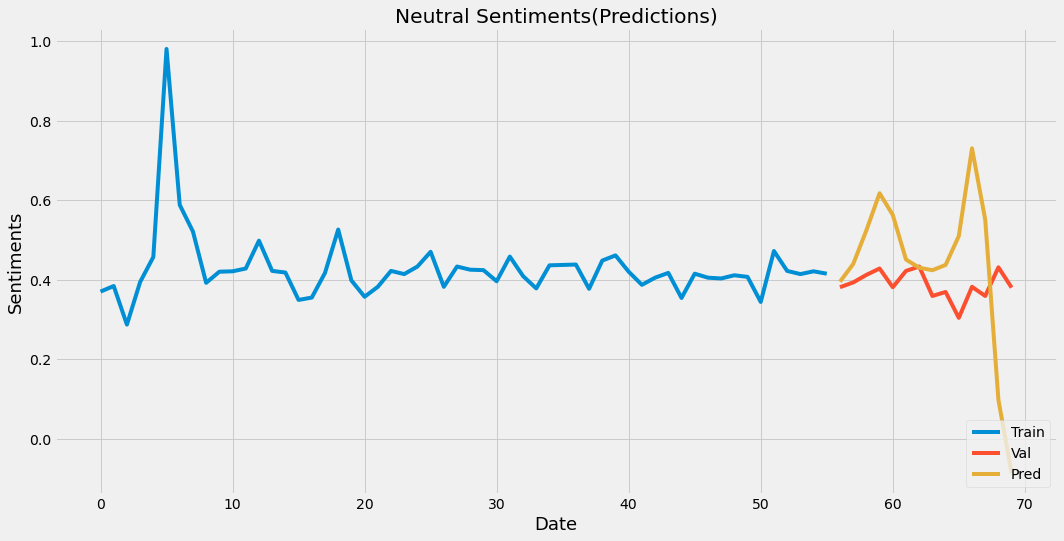

In [44]:
# Plot the data
train_neut = data_neut[:training_data_len]
valid_neut = data_neut[training_data_len:]
valid_neut['Predictions'] = predictions_neut

# Visualization
plt.figure(figsize=(16,8))
plt.title('Neutral Sentiments(Predictions)')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Sentiments', fontsize=18)
plt.plot(train_neut['Neutral'])
plt.plot(valid_neut[['Neutral', 'Predictions']])
plt.legend(['Train', 'Val', 'Pred'], loc='lower right')
plt.show()

valid_neut-->     Neutral  Predictions
56    0.381     0.425701
57    0.393     0.430204
58    0.412     0.436691
59    0.428     0.444486
60    0.381     0.426983
61    0.422     0.409182
62    0.433     0.417905
63    0.359     0.420713
64    0.369     0.419793
65    0.304     0.436710
66    0.382     0.484376
67    0.359     0.472619
68    0.431     0.433058
69    0.380     0.395832
x_input_neut--> (1, 10)
[0.07240965]
11
1 day input [0.40918195 0.41790479 0.4207125  0.41979343 0.43670991 0.48437649
 0.47261855 0.43305796 0.39583176 0.07240965]
1 day output [[0.05482135]]
2 day input [0.41790479 0.4207125  0.41979343 0.43670991 0.48437649 0.47261855
 0.43305796 0.39583176 0.07240965 0.05482135]
2 day output [[0.04644641]]
3 day input [0.4207125  0.41979343 0.43670991 0.48437649 0.47261855 0.43305796
 0.39583176 0.07240965 0.05482135 0.04644641]
3 day output [[0.05827938]]
4 day input [0.41979343 0.43670991 0.48437649 0.47261855 0.43305796 0.39583176
 0.07240965 0.05482135 0.04644641

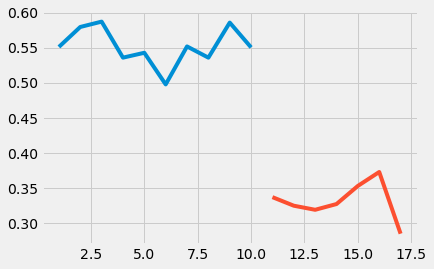

In [45]:
print('valid_neut-->', valid_neut)


x_input_neut=predictions_neut[4:].reshape(1,-1)
print('x_input_neut-->', x_input_neut.shape)


temp_input_neut=list(x_input_neut)
temp_input_neut=temp_input_neut[0].tolist()


# demonstrate prediction for next 7 days
from numpy import array

lst_output_neut=[]
n_steps=10
i=0
while(i<7):
    
    if(len(temp_input_neut)>10):
        #print(temp_input)
        x_input_neut=np.array(temp_input_neut[1:])
        print("{} day input {}".format(i,x_input_neut))
        x_input_neut=x_input_neut.reshape(1,-1)
        x_input_neut = x_input_neut.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_neut.predict(x_input_neut, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input_neut.extend(yhat[0].tolist())
        temp_input_neut=temp_input_neut[1:]
        #print(temp_input)
        lst_output_neut.extend(yhat.tolist())
        i=i+1
    else:
        x_input_neut = x_input_neut.reshape((1, n_steps,1))
        yhat = model_neut.predict(x_input_neut, verbose=0)
        print(yhat[0])
        temp_input_neut.extend(yhat[0].tolist())
        print(len(temp_input_neut))
        lst_output_neut.extend(yhat.tolist())
        i=i+1
    
print()
print('next_seven_days_pred-->', lst_output_neut)


day_new=np.arange(1,11)
day_pred=np.arange(11, 18)


plt.plot(day_new,scaler.inverse_transform(data_neut[60:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output_neut))

# Test data

In [47]:
new_df = pd.read_csv('../input/COVID-19_test.csv')

In [48]:
new_df.head()

,Text_Id,Text,Date,Location,Sentiments
0,1267312445464301569,RT @INCMumbai: On this #WorldMilkDay we expres...,Mon Jun 01 04:30:07 +0000 2020,"Jaipur, India",0.000000
1,1267312446236241920,RT @drthomasisaac: A 100 member medical team o...,Mon Jun 01 04:30:07 +0000 2020,mumbai,0.000000
2,1267312452665896961,ETAuto | Tata Motors' approach to seamless des...,Mon Jun 01 04:30:08 +0000 2020,"New Delhi, India",0.100000
3,1267312444164079616,COVID-19: What now for tennis in 2020? https:/...,Mon Jun 01 04:30:06 +0000 2020,"Noida, India",0.000000
4,1267312449679581189,#CoronaVirusUpdates | 25 new #COVID19 cases ha...,Mon Jun 01 04:30:08 +0000 2020,India,0.068182


In [49]:
# Modifying Date
new_df['Date'] = pd.to_datetime(new_df['Date']).dt.date.apply(str)

In [50]:
# Creating new_sentiments column out of polarities in sentiments
New_Sentiments_ls = []

for senti in new_df['Sentiments']:
    if senti < 0:
        New_Sentiments_ls.append(-1)
    elif senti > 0:
        New_Sentiments_ls.append(1)
    else:
        New_Sentiments_ls.append(0)

New_Sentiments_ls = pd.DataFrame(New_Sentiments_ls, columns=['New_Sentiments'])

new_df = pd.concat([new_df, New_Sentiments_ls], axis=1)

In [51]:
new_df.head()

,Text_Id,Text,Date,Location,Sentiments,New_Sentiments
0,1267312445464301569,RT @INCMumbai: On this #WorldMilkDay we expres...,2020-06-01,"Jaipur, India",0.000000,0
1,1267312446236241920,RT @drthomasisaac: A 100 member medical team o...,2020-06-01,mumbai,0.000000,0
2,1267312452665896961,ETAuto | Tata Motors' approach to seamless des...,2020-06-01,"New Delhi, India",0.100000,1
3,1267312444164079616,COVID-19: What now for tennis in 2020? https:/...,2020-06-01,"Noida, India",0.000000,0
4,1267312449679581189,#CoronaVirusUpdates | 25 new #COVID19 cases ha...,2020-06-01,India,0.068182,1


In [52]:
# Creating new columns of each sentiments
new_df['Sentiment_1'] = new_df['New_Sentiments'].apply(lambda x: 1 if x == 1 else 0)
new_df['Sentiment_neg_1'] = new_df['New_Sentiments'].apply(lambda x: 1 if x == -1 else 0)
new_df['Sentiment_0'] = new_df['New_Sentiments'].apply(lambda x: 1 if x == 0 else 0)

In [53]:
# Accessing different dates and storing it in the list...
date_list = list(sorted(set([i for i in new_df['Date']])))

In [54]:
# Creating empty dictionaries; used to update dates along with its probabilities of sentiments
sentiment_1_dict = dict()
sentiment_neg_1_dict = dict()
sentiment_0_dict = dict()

for dates in date_list:
    for ids in np.where(new_df.Date == dates):
        total_setiments = len(new_df.loc[ids, 'New_Sentiments'])
        total_pos_sentiment = sum(new_df.loc[ids, 'Sentiment_1'])
        total_neg_sentiment = sum(new_df.loc[ids, 'Sentiment_neg_1'])
        total_neutral_sentiment = sum(new_df.loc[ids, 'Sentiment_0'])

        # updates the respective probabilities of sentiments in each dictionaries
        sentiment_1_dict[dates] = round(total_pos_sentiment/total_setiments, 3)
        sentiment_neg_1_dict[dates] = round(
            total_neg_sentiment/total_setiments, 3)
        sentiment_0_dict[dates] = round(
            total_neutral_sentiment/total_setiments, 3)

In [55]:
new_df.head()

,Text_Id,Text,Date,Location,Sentiments,New_Sentiments,Sentiment_1,Sentiment_neg_1,Sentiment_0
0,1267312445464301569,RT @INCMumbai: On this #WorldMilkDay we expres...,2020-06-01,"Jaipur, India",0.000000,0,0,0,1
1,1267312446236241920,RT @drthomasisaac: A 100 member medical team o...,2020-06-01,mumbai,0.000000,0,0,0,1
2,1267312452665896961,ETAuto | Tata Motors' approach to seamless des...,2020-06-01,"New Delhi, India",0.100000,1,1,0,0
3,1267312444164079616,COVID-19: What now for tennis in 2020? https:/...,2020-06-01,"Noida, India",0.000000,0,0,0,1
4,1267312449679581189,#CoronaVirusUpdates | 25 new #COVID19 cases ha...,2020-06-01,India,0.068182,1,1,0,0


In [56]:
the_dates = ['2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07']

In [58]:
train_pos_plot_1 = list(train_pos['Positive'])
train_neg_plot_1 = list(train_neg['Negative'])
train_neut_plot_1 = list(train_neut['Neutral'])

train_pos_plot_1.append(list(valid_pos['Positive'])[0])
train_neg_plot_1.append(list(valid_neg['Negative'])[0])
train_neut_plot_1.append(list(valid_neut['Neutral'])[0])

In [59]:
import plotly.graph_objects as go

fig = go.Figure()

# config = {'staticPlot': True}

fig.add_trace(
    go.Scatter(
        x=list(df1.Date)[40:57],
        y=train_pos_plot_1,
        mode='lines+markers',
        name='Training',
        line = dict(width=4)
    ))
fig.add_trace(
    go.Scatter(
        x=list(df1.Date)[56:],
        y=valid_pos['Positive'],
        mode='lines+markers',
        name='Validation',
        line = dict(width=4)
    ))
fig.add_trace(
    go.Scatter(
        x=list(df1.Date)[56:],
        y=valid_pos['Predictions'],
        mode='lines+markers',
        name='Predictions',
        line = dict(width=4)
    ))
fig.add_trace(
    go.Scatter(
        x=the_dates,
        y=list(scaler.inverse_transform(lst_output_pos).flatten()),
        mode='lines+markers',
        name='Next 7 Days',
        line = dict(width=4)
    ))

# Set options common to all traces with fig.update_traces
fig.update_traces(marker_line_width=1, marker_size=10)

# Add dropdown
fig.update_layout(
    title=dict(text = 'Positive Predictions',
               x=0.5,
               y=0.9
              ),
    width=1000,
     yaxis=dict(
        title='Sentiments',
        titlefont_size=16,
        tickfont_size=14,
    ),
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "line"],
                    label="Line Graph",
                    method="restyle"
                ),
                dict(
                    args=[{"type": "bar"}],
                    label="Bar Graph",
                    method="restyle"
                )
            ]),
            type='buttons',
            direction="right",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.01,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
    ]
)

fig.show()

In [60]:
import plotly.graph_objects as go

fig = go.Figure()

# config = {'staticPlot': True}

fig.add_trace(
    go.Scatter(
        x=list(df1.Date)[40:57],
        y=train_neg_plot_1,
        mode='lines+markers',
        name='Training',
        line = dict(width=4)
    ))
fig.add_trace(
    go.Scatter(
        x=list(df1.Date)[56:],
        y=valid_neg['Negative'],
        mode='lines+markers',
        name='Validation',
        line = dict(width=4)
    ))
fig.add_trace(
    go.Scatter(
        x=list(df1.Date)[56:],
        y=valid_neg['Predictions'],
        mode='lines+markers',
        name='Predictions',
        line = dict(width=4)
    ))
fig.add_trace(
    go.Scatter(
        x=the_dates,
        y=list(scaler.inverse_transform(lst_output_neg).flatten()),
        mode='lines+markers',
        name='Next 7 Days',
        line = dict(width=4)
    ))

# Set options common to all traces with fig.update_traces
fig.update_traces(marker_line_width=1, marker_size=10)

# Add dropdown
fig.update_layout(
    title=dict(text = 'Negative Predictions',
               x=0.5,
               y=0.9
              ),
    width=1000,
     yaxis=dict(
        title='Sentiments',
        titlefont_size=16,
        tickfont_size=14,
    ),
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "line"],
                    label="Line Graph",
                    method="restyle"
                ),
                dict(
                    args=[{"type": "bar"}],
                    label="Bar Graph",
                    method="restyle"
                )
            ]),
            type='buttons',
            direction="right",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.01,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
    ]
)

fig.show()

In [61]:
import plotly.graph_objects as go

fig = go.Figure()

# config = {'staticPlot': True}

fig.add_trace(
    go.Scatter(
        x=list(df1.Date)[40:57],
        y=train_neut_plot_1,
        mode='lines+markers',
        name='Training',
        line = dict(width=4)
    ))
fig.add_trace(
    go.Scatter(
        x=list(df1.Date)[56:],
        y=valid_neut['Neutral'],
        mode='lines+markers',
        name='Validation',
        line = dict(width=4)
    ))
fig.add_trace(
    go.Scatter(
        x=list(df1.Date)[56:],
        y=valid_neut['Predictions'],
        mode='lines+markers',
        name='Predictions',
        line = dict(width=4)
    ))
fig.add_trace(
    go.Scatter(
        x=the_dates,
        y=list(scaler.inverse_transform(lst_output_neut).flatten()),
        mode='lines+markers',
        name='Next 7 Days',
        line = dict(width=4)
    ))

# Set options common to all traces with fig.update_traces
fig.update_traces(marker_line_width=1, marker_size=10)

# Add dropdown
fig.update_layout(
    title=dict(text = 'Neutral Predictions',
               x=0.5,
               y=0.9
              ),
    width=1000,
     yaxis=dict(
        title='Sentiments',
        titlefont_size=16,
        tickfont_size=14,
    ),
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "line"],
                    label="Line Graph",
                    method="restyle"
                ),
                dict(
                    args=[{"type": "bar"}],
                    label="Bar Graph",
                    method="restyle"
                )
            ]),
            type='buttons',
            direction="right",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.01,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
    ]
)

fig.show()

In [66]:
train_data = pd.DataFrame({
    'train_pos': list(train_pos['Positive']),
    'train_neg': list(train_neg['Negative']),
    'train_neut': list(train_neut['Neutral']),
})

valid_data = pd.DataFrame({
    'valid_pos': list(valid_pos['Positive']),
    'valid_pos_pred': list(valid_pos['Predictions']),
    'valid_neg': list(valid_neg['Negative']),
    'valid_neg_pred': list(valid_neg['Predictions']),
    'valid_neut': list(valid_neut['Neutral']),
    'valid_neut_pred': list(valid_neut['Predictions']),
})

output_data = pd.DataFrame({
    'lst_output_pos': list(scaler.inverse_transform(lst_output_pos).flatten()),
    'lst_output_neg': list(scaler.inverse_transform(lst_output_neg).flatten()),
    'lst_output_neut': list(scaler.inverse_transform(lst_output_neut).flatten())   
})

ValueError: If using all scalar values, you must pass an index

In [ ]:
train_data.to_csv('train_data.csv', index=False)
valid_data.to_csv('valid_data.csv', index=False)
output_data.to_csv('output_data.csv', index=False)

# Another step

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('COVID-19_Sentiments.csv')

In [ ]:
df.head()

In [ ]:
India_state_list = ['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
              'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
              'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep','Madhya Pradesh',
              'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
              'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'
             ]

In [ ]:
Location_list = []
text_list = []
for locations, text in zip(df.Location, df.Text):
    locations = locations.lower().split(',')[0]
    
    for states in India_state_list:
        states = states.lower()
        if locations == states:
            Location_list.append(states)
            text_list.append(text)

In [ ]:
df = pd.DataFrame({'Locations': Location_list,
                          'Text': text_list
                         })

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
# Converting to lower case
df['Text'] = df['Text'].apply(lambda x: x.lower())

# Removing urls
df['Text'] = df['Text'].apply(lambda x: x.split('https')[0])
df['Text'] = df['Text'].apply(lambda x: x.split('http')[0])

In [ ]:
def func(x):
    try:
        return x.split('#')[1].split(' ')[0]
    except:
        return None

# Remove @username
df['Regenerated_Text'] = df['Text'].apply(lambda x: func(x))

In [ ]:
df.head()

In [ ]:
# Removing unwanted char
df['Regenerated_Text'] = df['Regenerated_Text'].str.replace("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ")  

In [ ]:
for i in df.Text:
    print(i)

In [ ]:
for i in df.Regenerated_Text:
    print(i)

In [ ]:
dict(df[df.Locations == 'andhra pradesh'].Regenerated_Text.value_counts().head())

In [ ]:
# Accessing different locations...
locations_list = list(sorted(set([i for i in df.Locations])))

In [ ]:
# Creating empty dictionaries; used to update locations along with its probabilities percentage of sentiments
state_tags_dict = dict()

for locations in locations_list:
    tags_count_dict = dict(df[df.Locations == locations].Regenerated_Text.value_counts().head())
    state_tags_dict[locations] = tags_count_dict

In [ ]:
state_tags_dict['punjab']

In [ ]:
import plotly.graph_objects as go


# create figure
fig = go.Figure()


# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=list(state_tags_dict['haryana'].keys()),
            y=list(state_tags_dict['haryana'].values()),
            text=list(state_tags_dict['haryana'].values()),
            textposition='outside',
        )])

# Customize aspect
fig.update_traces(marker_color=colors, marker_line_color='black',
                  marker_line_width=1.5, opacity=0.6, hoverinfo="none")

# Updating x-axis properties
fig.update_xaxes(showgrid=False, showticklabels=False)

# Updating y-axis properties
fig.update_yaxes(showgrid=False, automargin=True)

# Updating layout
fig.update_layout(template='plotly_white',
                  width=600,
                  yaxis = dict(
                        tickmode = 'array',
                        tickvals = [i for i in range(5, num2, num)],
                        ticktext = y_ticktext_list[::-1]
                    )
                 )

config = {'displayModeBar': False}
fig.show()

In [ ]:
y_ticktext_list = []
for keys, values in state_tags_dict['haryana'].items():
    text_displayed = f'{keys} {values}'
    y_ticktext_list.append(text_displayed)

In [ ]:
num=list(state_tags_dict['haryana'].values())[0]//5
num2=list(state_tags_dict['haryana'].values())[0]

In [ ]:
[i for i in range(5, num2, num)]

In [ ]:
colors=['red', 'darkorange', 'gold', 'greenyellow', 'lime']